In [4]:
def BubbleSort(L):
  for i in range(len(L)-1, 0,-1):
    for j in range(i):
      if (L[j+1]< L[j]):
        L[j], L[j+1] = L[j+1], L[j]
  return L[(len(L))//2]

def ForcaBruta(L):
  return sorted(L)[(len(L))//2]
  #return BubbleSort(L)
  
# L - o conjunto
# l - inicio
# r - final
# p - pivot
# s - posicao do ultimo item menor que p
# i - posicao do primeiro item a ser visitado
def LomutoPartition(L, l, r):
  p = L[l]
  s = l
  for i in range(l+1, r+1):
    if (L[i] < p):
      s = s + 1
      L[s], L[i] = L[i], L[s] 
  L[l], L[s] = L[s], L[l]
  return s

def DiminuirParaConquistar(L):
  l = 0
  r = len(L)-1
  k = (len(L)+1)//2
  return QuickSelect(L,l,r,k)

def QuickSelect(L, l, r, k):
  s = LomutoPartition(L,l,r)
  
  if (s == (k-1)):
    return L[s]
  else:
    if (s > k-1): 
      return QuickSelect(L,l,s-1,k)
    else:
      return QuickSelect(L,s+1,r,k)

In [ ]:
a = [5,9,3,3,6,8,7]
print("Força Bruta: sorted() do python")
print(ForcaBruta(a))

[3, 3, 5, 6, 7, 8, 9] 6
Força Bruta: sorted() do python
6


In [ ]:
a = [5,9,3,3,6,8,7]

print("Diminuir para conquistar: Quick Select com Lomuto Partition")
print(DiminuirParaConquistar(a))

Diminuir para conquistar: Quick Select com Lomuto Partition
6


In [27]:
import time
from numpy import random
DOMAIN = 10000000
def avg_time(domain, tam ,func,rounds):
  sum = float(0)
  if (func.__name__ == "DiminuirParaConquistar"):
    rounds = 200
    for i in range(rounds):
      random.seed(i)
      L=list(random.randint(domain, size=tam))
      start = time.time()
      func(L)
      end = time.time()
      sum+= end-start
  else:
    rounds = 50
    for i in range(rounds):
      random.seed(i)
      L=list(random.randint(domain, size=tam))
      start = time.time()
      func(L)
      end = time.time()
      sum+= end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [DiminuirParaConquistar, ForcaBruta]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 100

##sizes 5M, 10M, 15M, 20M, 25M
#sizes = [5000000,10000000,15000000,20000000,25000000]

##sizes 2M, 2.5M, 3M, 3.5M, 4M
sizes = [2000000,2500000,3000000,3500000,4000000]

##sizes 10K, 15K, 20K, 25K, 30K, 35K
#sizes = [10000,15000,20000,25000,30000,35000]
##sizes = [50,100,150,200,250,300]

mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
    
     
  ##Map list size to algorithm average time
  for algorithm in algorithms:
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
    
print(f"Finish data collection")

Starting round 1, size=2000000
Starting round 2, size=2500000
Starting round 3, size=3000000
Starting round 4, size=3500000
Starting round 5, size=4000000
Finish data collection


In [28]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
DiminuirParaConquistar##2000000,1.442922,DiminuirParaConquistar,2000000
ForcaBruta##2000000,1.628033,ForcaBruta,2000000
DiminuirParaConquistar##2500000,1.759440,DiminuirParaConquistar,2500000
ForcaBruta##2500000,2.106221,ForcaBruta,2500000
DiminuirParaConquistar##3000000,2.133699,DiminuirParaConquistar,3000000
ForcaBruta##3000000,2.609590,ForcaBruta,3000000
DiminuirParaConquistar##3500000,2.587067,DiminuirParaConquistar,3500000
ForcaBruta##3500000,3.128596,ForcaBruta,3500000
DiminuirParaConquistar##4000000,2.954519,DiminuirParaConquistar,4000000
ForcaBruta##4000000,3.665709,ForcaBruta,4000000


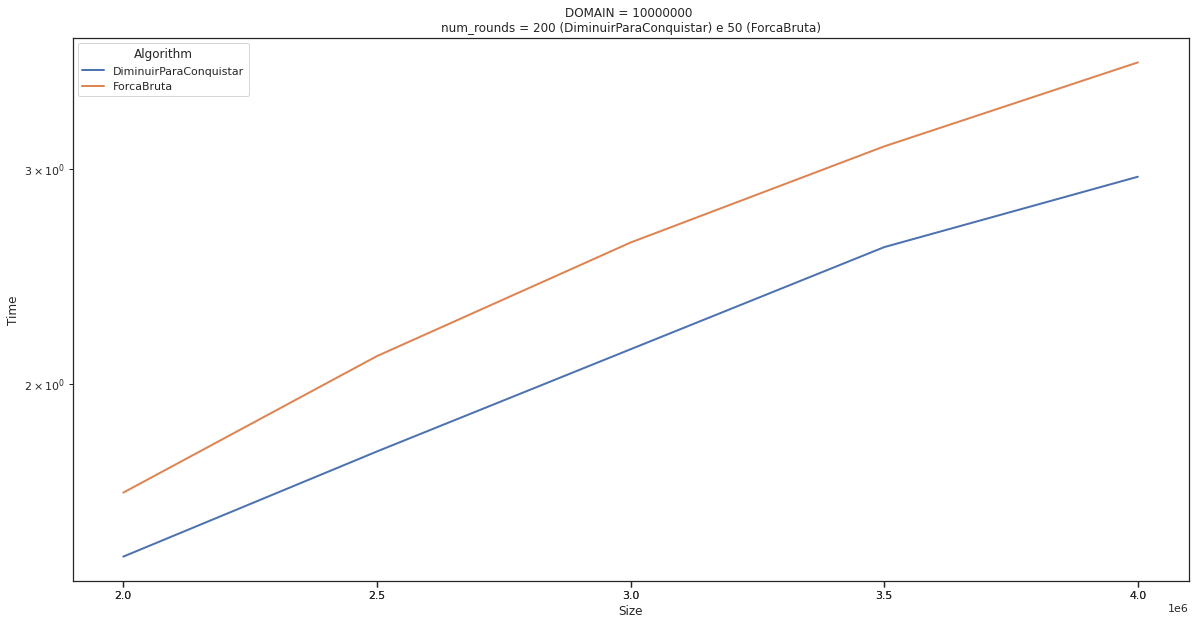

In [32]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.title("DOMAIN = 10000000 \nnum_rounds = 200 (DiminuirParaConquistar) e 50 (ForcaBruta)")
plt.show()